## Histogramas

Es una práctica común crear histogramas para explorar los datos, ya que pueden brindar una idea general de cómo se ven. Un histograma es un resumen de la variación de una variable medida. Muestra la cantidad de muestras que se encuentran en una categoría. Un histograma es un tipo de distribución de frecuencia.

Los histogramas funcionan agrupando todo el rango de valores en una serie de intervalos y luego contando cuántos valores caen en cada intervalo. Si bien los intervalos suelen tener el mismo tamaño, no es necesario que lo sean.

In [1]:
# Usando `ìnline` no sea necesario escribir código adicional `plt.show()` para mostrar los gráficos
%matplotlib inline

import pandas as pd
import numpy as np

# `plt` es un alias para el módulo `matplotlib.pyplot`
import matplotlib.pyplot as plt

# importa libreria seaborn (contenedor de matplotlib)
import seaborn as sns

### Cargando Datos para nuestros graficos

Usaremos información sobre publicación de trabajos en las bolsas de internet

In [6]:
df = pd.read_csv('content/car_m_v_dataset.csv', skiprows=1, encoding='latin-1')
df.head()

,marca,modelo,año,sengmento,precio_max,precio_min,pasajeros,peso,transmision,combustible,...,camara_360,bluetooth,android_auto/apple+play,cruise_control,cruise_control_advanced,blind_spot_alert,sensor_lluvia,car_tow,car_pull,tipo_chasis
0,Toyota,Yaris BASE MT,2024,Sedan-SmallSize,"$316,100","$316,100",5,1035,S,Gas,...,no,yes,yes,no,no,no,no,no,no,Sedan
1,Toyota,Yaris BASE CVT,2024,Sedan-SmallSize,"$331,100","$331,100",5,1035,A,Gas,...,no,yes,yes,no,no,no,no,no,no,Sedan
2,Toyota,Yaris S MT,2024,Sedan-SmallSize,"$341,000","$341,000",5,1035,S,Gas,...,no,yes,yes,no,no,no,no,no,no,Sedan
3,Toyota,Yaris S CVT,2024,Sedan-SmallSize,"$356,000","$356,000",5,1035,A,Gas,...,no,yes,yes,no,no,no,no,no,no,Sedan
4,Toyota,Yaris S CVT Hi,2024,Sedan-SmallSize,"$392,200","$392,200",5,1035,A,Gas,...,no,yes,yes,yes,yes,yes,no,no,no,Sedan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marca                    241 non-null    object 
 1   modelo                   241 non-null    object 
 2   año                      241 non-null    int64  
 3   sengmento                241 non-null    object 
 4   precio_max               241 non-null    object 
 5   precio_min               241 non-null    object 
 6   pasajeros                241 non-null    int64  
 7   peso                     241 non-null    int64  
 8   transmision              241 non-null    object 
 9   combustible              241 non-null    object 
 10  tanque                   241 non-null    object 
 11  consumo                  237 non-null    float64
 12  largo                    241 non-null    float64
 13  ancho                    241 non-null    float64
 14  altura                   2

In [13]:
df["precio_max"] = df["precio_max"].str.replace(r'\D+', '', regex=True)
df["precio_max"] = df["precio_max"].astype(int)

## Histograms using Pandas

The goal of this particular visualization is to make a histogram on the `price` column. In doing this, you will see creating a data visualization can be an iterative process.

In [14]:
df['precio_max'].head()

0    316100
1    331100
2    341000
3    356000
4    392200
Name: precio_max, dtype: int64

<Axes: >

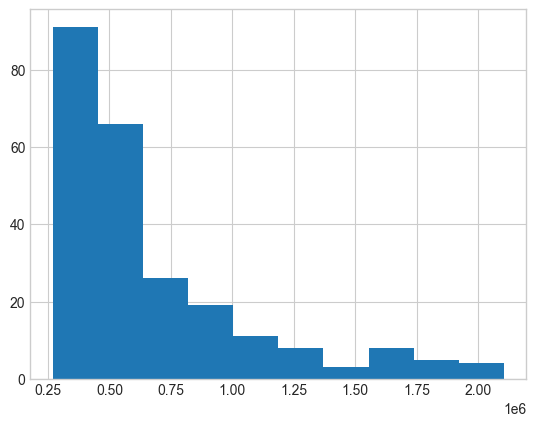

In [15]:
# Usar la configuración predeterminada no es una buena idea
# Tenga en cuenta que las visualizaciones son un proceso interactivo.
df['precio_max'].hist()

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 [Text(0.0, 0, '0.00'),
  Text(250000.0, 0, '0.25'),
  Text(500000.0, 0, '0.50'),
  Text(750000.0, 0, '0.75'),
  Text(1000000.0, 0, '1.00'),
  Text(1250000.0, 0, '1.25'),
  Text(1500000.0, 0, '1.50'),
  Text(1750000.0, 0, '1.75'),
  Text(2000000.0, 0, '2.00'),
  Text(2250000.0, 0, '2.25')])

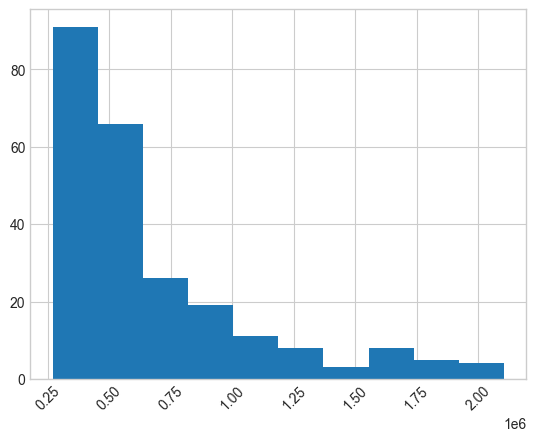

In [18]:
# Una solución es rotar tus xticklabels
df['precio_max'].hist()
plt.xticks(rotation = 45)

In [19]:
# Si desea una solución rápida para que las etiquetas xtick sean legibles,
# intente cambiar el estilo del gráfico
plt.style.use("seaborn-v0_8-whitegrid")

<Axes: >

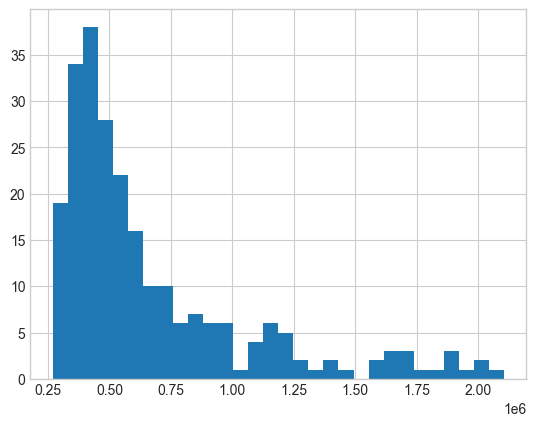

In [20]:
# Cambiar el número de contenedores
# Parece mejor, pero todavía tenemos espacio vacío
df['precio_max'].hist(bins = 30)

<Axes: >

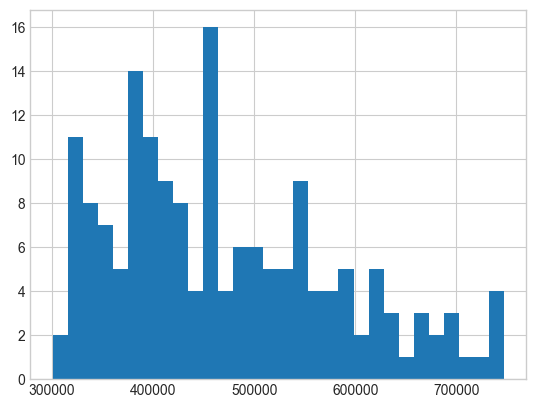

In [21]:
# visualizar un subconjunto de los datos

price_filter = df.loc[:, 'precio_max'].between(300000, 750000)
df.loc[price_filter, 'precio_max'].hist(bins = 30)

<Axes: >

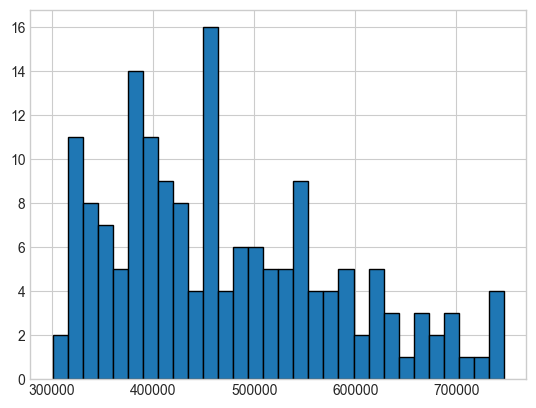

In [22]:
# También puedes cambiar el color del borde y el ancho de línea.
price_filter = df.loc[:, 'precio_max'].between(300000, 750000)

# También puedes cambiar el color del borde y el ancho de línea.
df.loc[price_filter, 'precio_max'].hist(bins = 30,
                                   edgecolor='black')